In [1]:
import importlib

import pandas as pd
from IPython.display import display

import warnings

import Semantic_Maningfullness

warnings.filterwarnings('ignore')

from carla.data.causal_model import CausalModel

/home/jacqueline/.local/share/virtualenvs/CARLA-7s4zdYsf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jacqueline/.local/share/virtualenvs/CARLA-7s4zdYsf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jacqueline/.local/share/virtualenvs/CARLA-7s4zdYsf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint

[INFO] Using Python-MIP package version 1.12.0 [model.py <module>]


In [2]:
import numpy as np 
import torch
import random

#SEED Setting
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

In [3]:
import pandas as pd


# generate data
scm = CausalModel("credit")
dataset = scm.generate_dataset(10000, False)

# save data
# dataset.df.to_csv('generate_dataset.csv')

display(dataset.df)

7
(10000,)
fuzzy False
threshold (10000, 1)
predictions 0       0.505940
1       0.779461
2       0.502862
3       0.488590
4       0.478696
          ...   
9995    0.496160
9996    0.496148
9997    0.487464
9998    0.423962
9999    0.471737
Length: 10000, dtype: float64


,label,x1,x2,x3,x4,x6,x5,x7
0,1.0,0.0,-14.912130,-0.139401,-3.177573,-1.309797,-9.271667,-4.800593
1,1.0,1.0,-11.993219,-0.073378,0.382639,-1.217230,0.348262,-10.061911
2,1.0,1.0,12.442664,0.294505,2.954868,2.830570,1.477419,7.258035
3,0.0,1.0,-1.934707,-0.079643,1.826950,-0.849983,3.988270,0.620325
4,0.0,0.0,7.959508,0.102606,-2.416051,-1.131018,4.621681,1.386415
...,...,...,...,...,...,...,...,...
9995,0.0,1.0,-4.223694,0.208084,5.085529,-3.423040,5.935269,2.099414
9996,0.0,1.0,0.866720,-0.169033,4.399357,-1.817170,9.847335,4.167955
9997,0.0,1.0,1.623659,0.003838,3.972927,-1.881602,5.123379,-5.667337
9998,0.0,0.0,2.626240,-0.224506,-0.504758,1.064073,-3.194106,-2.781699


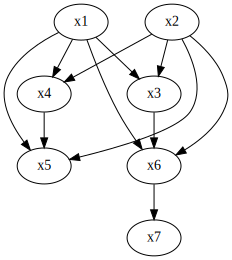

In [4]:
#Visualize the model
scm.cgm.draw()

In [5]:
from carla.models.catalog import MLModelCatalog

training_params = {"lr": 0.01, "epochs": 10, "batch_size": 16, "hidden_size": [18, 9, 3]}

ml_model = MLModelCatalog(
    dataset, model_type="ann", load_online=False, backend="pytorch"
)
ml_model.train(
    learning_rate=training_params["lr"],
    epochs=training_params["epochs"],
    batch_size=training_params["batch_size"],
    hidden_size=training_params["hidden_size"],
    force_train=True
)



balance on test set 0.5109333333333334, balance on test set 0.5012
Epoch 0/9
----------
train Loss: 0.2148 Acc: 0.9091

test Loss: 0.1331 Acc: 0.9520

Epoch 1/9
----------
train Loss: 0.1164 Acc: 0.9513

test Loss: 0.1466 Acc: 0.9440

Epoch 2/9
----------
train Loss: 0.1017 Acc: 0.9593

test Loss: 0.1780 Acc: 0.9492

Epoch 3/9
----------
train Loss: 0.0928 Acc: 0.9623

test Loss: 0.1148 Acc: 0.9468

Epoch 4/9
----------
train Loss: 0.0868 Acc: 0.9652

test Loss: 0.1267 Acc: 0.9480

Epoch 5/9
----------
train Loss: 0.0832 Acc: 0.9677

test Loss: 0.0797 Acc: 0.9676

Epoch 6/9
----------
train Loss: 0.0764 Acc: 0.9687

test Loss: 0.1061 Acc: 0.9464

Epoch 7/9
----------
train Loss: 0.0748 Acc: 0.9693

test Loss: 0.0765 Acc: 0.9712

Epoch 8/9
----------
train Loss: 0.0701 Acc: 0.9724

test Loss: 0.0823 Acc: 0.9660

Epoch 9/9
----------
train Loss: 0.0635 Acc: 0.9760

test Loss: 0.0835 Acc: 0.9680



In [6]:
from carla.models.negative_instances import predict_negative_instances
# get factuals
factuals = predict_negative_instances(ml_model, dataset.df)
test_factual_with_labels = factuals.iloc[:10].reset_index(drop=True)
test_factual=test_factual_with_labels.copy()

print(test_factual)

   label   x1         x2        x3        x4        x6        x5         x7
0    1.0  1.0 -11.993219 -0.073378  0.382639 -1.217230  0.348262 -10.061911
1    0.0  1.0  -1.934707 -0.079643  1.826950 -0.849983  3.988270   0.620325
2    0.0  0.0   7.959508  0.102606 -2.416051 -1.131018  4.621681   1.386415
3    0.0  1.0  -4.068187 -0.241530 -0.815960 -1.031546  1.247106  -8.734407
4    0.0  1.0  -5.902187 -0.018477  2.911046  1.926053  4.490890  -1.472124
5    1.0  0.0  -8.125164 -0.082960  0.367811 -1.309510  1.070609  -9.497215
6    0.0  0.0  14.890755  0.231051  2.750332 -1.325314 -0.691101   3.739968
7    0.0  0.0 -10.100981 -0.228061  3.114120 -0.384082  1.704199  -3.745377
8    0.0  0.0   2.363364 -0.182354  2.393990 -3.351626  1.369725  -2.079756
9    0.0  1.0  -3.031812 -0.131225 -1.884005  3.371095 -2.498739  -7.149300


In [7]:
#USE WACHTER INSTEAD OF CAUSAL RECOURSE --> ACTION MATRIX GETS TOO LARGE TO RUN LOCALLY !

#from carla.recourse_methods.catalog.causal_recourse import (
#    CausalRecourse,
#    constraints,
#    samplers,
#)
#hyperparams = {
#    "optimization_approach": "brute_force",
#    "num_samples": 10,
#    "scm": scm,
#    "constraint_handle": constraints.point_constraint,
#    "sampler_handle": samplers.sample_true_m0,
#}

#print(len(test_factual))
## structural counterfactual (SCF)
#cfs = CausalRecourse(ml_model, hyperparams).get_counterfactuals(test_factual)
#print(len(cfs))
#output = cfs.reset_index(drop=True) - test_factual.loc[:,~test_factual.columns.isin(['label'])].reset_index(drop=True)
#display(output)
#display(cfs)

In [8]:
scm_output=CausalModel("credit_output")

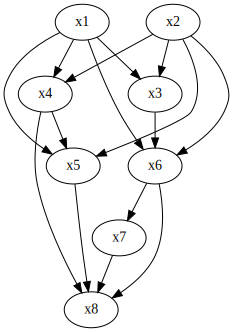

In [9]:
#Visualize the model
scm_output.cgm.draw()

In [10]:
import carla.evaluation.catalog as evaluation_catalog
from carla.data.catalog import CsvCatalog
from carla import Benchmark
from Semantic_Maningfullness import Sematic
importlib.reload(Semantic_Maningfullness)
mapping_dict={ 
      'u1': 'x1',
      'u2': 'x2',
    'u3': 'x3',
      }
# first initialize the benchmarking class by passing
# black-box-model, recourse method, and factuals into it

#Build dataset Compatible with wachter: 


# Build Dataset usable with Wachter
import pandas as pd
# Load Data 
dataset.df.to_csv('temp.csv',index=False)
dataframe = pd.read_csv('temp.csv')
continuous = dataframe.drop(columns=['label']).columns

dataset = CsvCatalog(file_path="temp.csv",
                     continuous=continuous,
                     categorical=[],
                     immutables=[],
                     target='label')

#TODO unforunatly need to retrain model, due to dataset / implmentation
from carla.models.catalog import MLModelCatalog

training_params = {"lr": 0.01, "epochs": 10, "batch_size": 16, "hidden_size": [18, 9, 3]}

ml_model = MLModelCatalog(
    dataset, model_type="ann", load_online=False, backend="pytorch"
)
ml_model.train(
    learning_rate=training_params["lr"],
    epochs=training_params["epochs"],
    batch_size=training_params["batch_size"],
    hidden_size=training_params["hidden_size"],
    force_train=True
)

factuals = predict_negative_instances(ml_model, dataset.df)
test_factual_with_labels = factuals.reset_index(drop=True)
test_factual=test_factual_with_labels.copy()
print(len(test_factual))
'''Wachter Recourse'''
import carla.recourse_methods.catalog as recourse_catalog
hyperparams = {"loss_type": "BCE"}

recourse_wachter =  recourse_catalog.wachter.model.Wachter(ml_model, hyperparams)

benchmark_wachter = Benchmark(ml_model, recourse_wachter, test_factual)

# now you can decide if you want to run all measurements
# or just specific ones.
evaluation_measures = [
    #evaluation_catalog.YNN(benchmark.mlmodel, {"y": 5, "cf_label": 1}),
    #evaluation_catalog.Distance(benchmark.mlmodel),
    #evaluation_catalog.SuccessRate(),
    #evaluation_catalog.Redundancy(benchmark.mlmodel, {"cf_label": 1}),
    #evaluation_catalog.ConstraintViolation(benchmark_wachter.mlmodel),
    #evaluation_catalog.AvgTime({"time": benchmark_wachter.timer}),
    Sematic(ml_model,scm_output,mapping_dict),    
]

# now run all implemented measurements and create a
# DataFrame which consists of all results
results = benchmark_wachter.run_benchmark(evaluation_measures)

display(results.head(5))





balance on test set 0.5096, balance on test set 0.5052
Epoch 0/9
----------
train Loss: 0.6237 Acc: 0.6269

test Loss: 0.5253 Acc: 0.7400

Epoch 1/9
----------
train Loss: 0.4872 Acc: 0.7623

test Loss: 0.4235 Acc: 0.8068

Epoch 2/9
----------
train Loss: 0.3831 Acc: 0.8245

test Loss: 0.3046 Acc: 0.8772

Epoch 3/9
----------
train Loss: 0.3301 Acc: 0.8548

test Loss: 0.3046 Acc: 0.8704

Epoch 4/9
----------
train Loss: 0.3003 Acc: 0.8693

test Loss: 0.2738 Acc: 0.8836

Epoch 5/9
----------
train Loss: 0.2827 Acc: 0.8751

test Loss: 0.2256 Acc: 0.9216

Epoch 6/9
----------
train Loss: 0.2757 Acc: 0.8833

test Loss: 0.2118 Acc: 0.9204

Epoch 7/9
----------
train Loss: 0.2639 Acc: 0.8884

test Loss: 0.2076 Acc: 0.9176

Epoch 8/9
----------
train Loss: 0.2489 Acc: 0.8915

test Loss: 0.2067 Acc: 0.9176

Epoch 9/9
----------
train Loss: 0.2437 Acc: 0.8916

test Loss: 0.2325 Acc: 0.8920

3946
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanat

,semantic
0,0
1,0
2,0
3,0
4,0


In [11]:
# Averaging of the reults
# In  one case the DL Model and SCM Model are consistently wrong !
mean= np.mean(results)
std= np.std(results)
print(f'Semantic results {mean} +/- {std}')

Semantic results semantic    0.013431
dtype: float64 +/- semantic    0.115113
dtype: float64
